In [1]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### For GPU CUDA

In [2]:
import logging
handler = logging.basicConfig(level=logging.INFO)
lgr = logging.getLogger(__name__)

# GPU
use_cuda = False

FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor

### Import data

In [3]:
data = pd.read_csv('TTH15A_data_feature.csv', sep=',')
data

,date_epoch,avg,max,min
0,1.476551e+18,18.663968,18.704453,18.623482
1,1.476555e+18,18.596491,18.623482,18.582996
2,1.476558e+18,18.582996,18.623482,18.542510
3,1.476562e+18,18.562753,18.582996,18.542510
4,1.476566e+18,18.488529,18.502024,18.461538
...,...,...,...,...
31239,1.589012e+18,21.612903,21.720430,21.505376
31240,1.589015e+18,21.471774,21.559140,21.397849
31241,1.589019e+18,21.344086,21.397849,21.290323
31242,1.589022e+18,21.263441,21.344086,21.182796


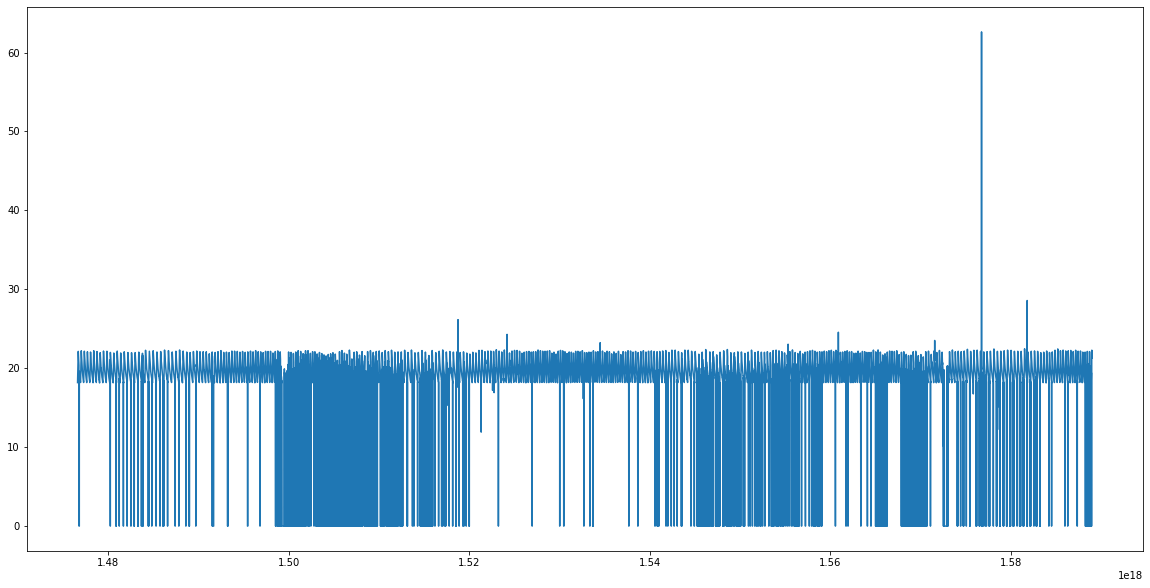

In [4]:
s_period = 14
e_period = 31243 #7000

# print('Period = ',e_period-s_period)
plt.figure(figsize=(20,10))
plt.plot(data['date_epoch'][s_period:e_period] ,
         data['avg'][s_period:e_period])

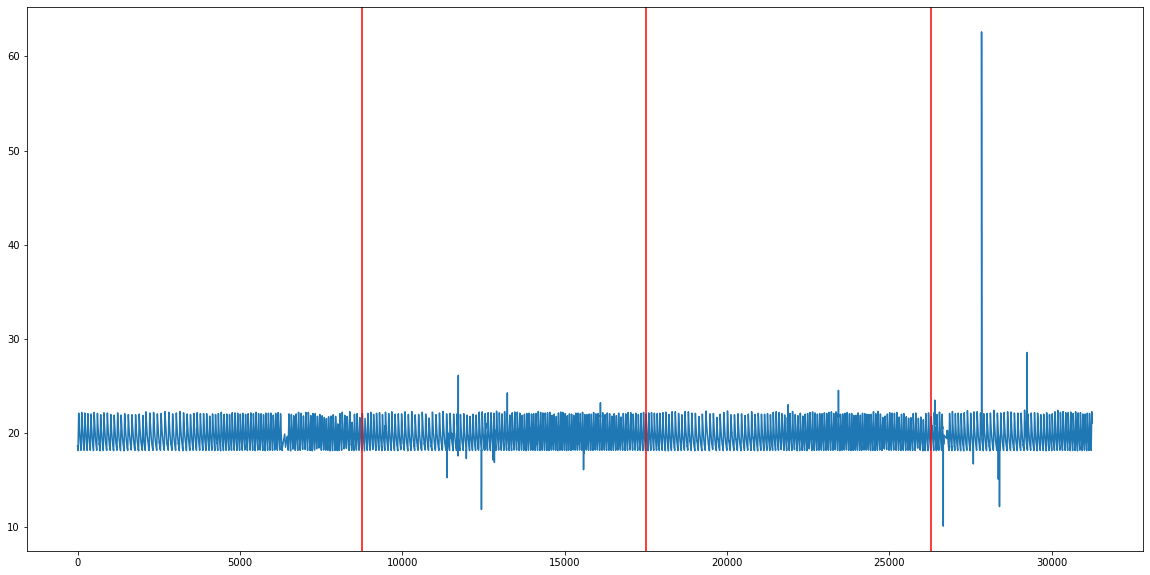

In [5]:
plt.figure(figsize=(20,10))
# plt.plot(data[data['avg']!=0]['max'])
# plt.plot(data[data['avg']!=0]['min'])
plt.plot(data[data['avg']!=0]['avg'])
plt.axvline(x=365*24, color='red')
plt.axvline(x=365*24+365*24, color='red')
plt.axvline(x=365*24+365*24+365*24, color='red')

In [6]:
# s_period = 14
# e_period = 31243 #7000

# # print('Period = ',e_period-s_period)
# plt.figure(figsize=(20,10))
# plt.plot([data['avg']['avg'][6200:6210])

# plt.plot(data['avg'][s_period:e_period],color='red')

SyntaxError: invalid syntax (<ipython-input-6-3e646712c092>, line 6)

In [ ]:
# data[28500:28550]

In [7]:
data['avg_na'], data['max_na'], data['min_na'] = 0,0,0
# data
for i in range(len(data)):
    if data['avg'][i] == 0.0:
        data['avg_na'][i] = np.nan
        data['min_na'][i] = np.nan
        data['max_na'][i] = np.nan
    else:
        data['avg_na'][i] = data['avg'][i]
        data['min_na'][i] = data['min'][i]
        data['max_na'][i] = data['max'][i]
            

In [8]:
data[50:80]

,date_epoch,avg,max,min,avg_na,max_na,min_na
50,1.476731e+18,20.851254,20.913978,20.806452,20.000000,20.000000,20.000000
51,1.476735e+18,20.779570,20.860215,20.698925,20.000000,20.000000,20.000000
52,1.476738e+18,20.721966,20.806452,20.645161,20.000000,20.000000,20.000000
53,1.476742e+18,20.580645,20.645161,20.537634,20.000000,20.000000,20.000000
54,1.476746e+18,20.568356,20.645161,20.483871,20.000000,20.000000,20.000000
55,1.476749e+18,20.456989,20.483871,20.430108,20.000000,20.000000,20.000000
56,1.476753e+18,20.359140,20.483871,20.322581,20.000000,20.000000,20.000000
57,1.476756e+18,0.000000,0.000000,0.000000,NaN,NaN,NaN
58,1.476760e+18,20.258065,20.322581,20.215054,20.258065,20.322581,20.215054
59,1.476764e+18,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [9]:
data = data.interpolate(method='polynomial', order=3)
data[50:80]

,date_epoch,avg,max,min,avg_na,max_na,min_na
50,1.476731e+18,20.851254,20.913978,20.806452,20.000000,20.000000,20.000000
51,1.476735e+18,20.779570,20.860215,20.698925,20.000000,20.000000,20.000000
52,1.476738e+18,20.721966,20.806452,20.645161,20.000000,20.000000,20.000000
53,1.476742e+18,20.580645,20.645161,20.537634,20.000000,20.000000,20.000000
54,1.476746e+18,20.568356,20.645161,20.483871,20.000000,20.000000,20.000000
55,1.476749e+18,20.456989,20.483871,20.430108,20.000000,20.000000,20.000000
56,1.476753e+18,20.359140,20.483871,20.322581,20.000000,20.000000,20.000000
57,1.476756e+18,0.000000,0.000000,0.000000,20.107117,20.132731,20.089656
58,1.476760e+18,20.258065,20.322581,20.215054,20.258065,20.322581,20.215054
59,1.476764e+18,0.000000,0.000000,0.000000,20.357513,20.453363,20.295291


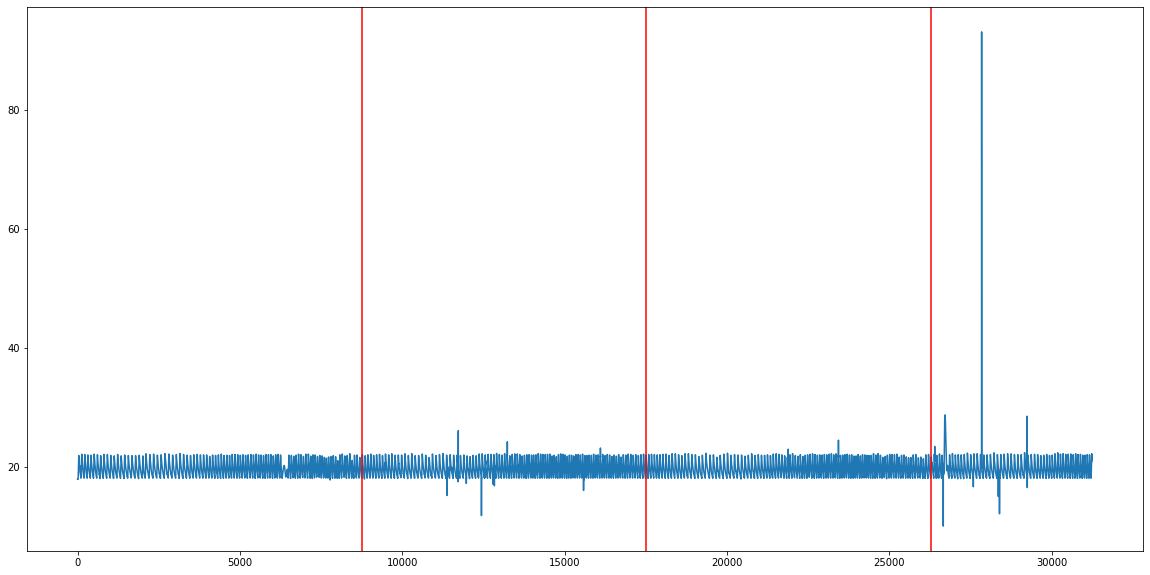

In [10]:
plt.figure(figsize=(20,10))
# plt.plot(data[data['avg']!=0]['max'])
# plt.plot(data[data['avg']!=0]['min'])
plt.plot(data['avg_na'])
plt.axvline(x=365*24, color='red')
plt.axvline(x=365*24+365*24, color='red')
plt.axvline(x=365*24+365*24+365*24, color='red')

In [11]:
type(data['avg_na'].values)

numpy.ndarray

In [12]:
# line number
line = 365*24

In [94]:
dataset = data['avg_na'].values


data_train = dataset[2*line:2*line+1000]
data_test = dataset[3*line:]

### Normalization

In [95]:
def normalize(data_train, data_test):
    max_value = np.max(data_train)
    min_value = np.min(data_test)
    
    scalar = max_value-min_value
    
    data_train = list(map(lambda x: (x-min_value)/scalar, data_train))
    data_test = list(map(lambda x: (x-min_value)/scalar, data_test))
    
    return data_train, data_test

data_train, data_test = normalize(data_train, data_test)

### Rolling window

In [96]:
def rolling_window(data, look_back, pattern_indices=[]):
    dataX=[]
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back)]
        dataX.append(list(a))
        
    dataX=np.array(dataX)
    return dataX

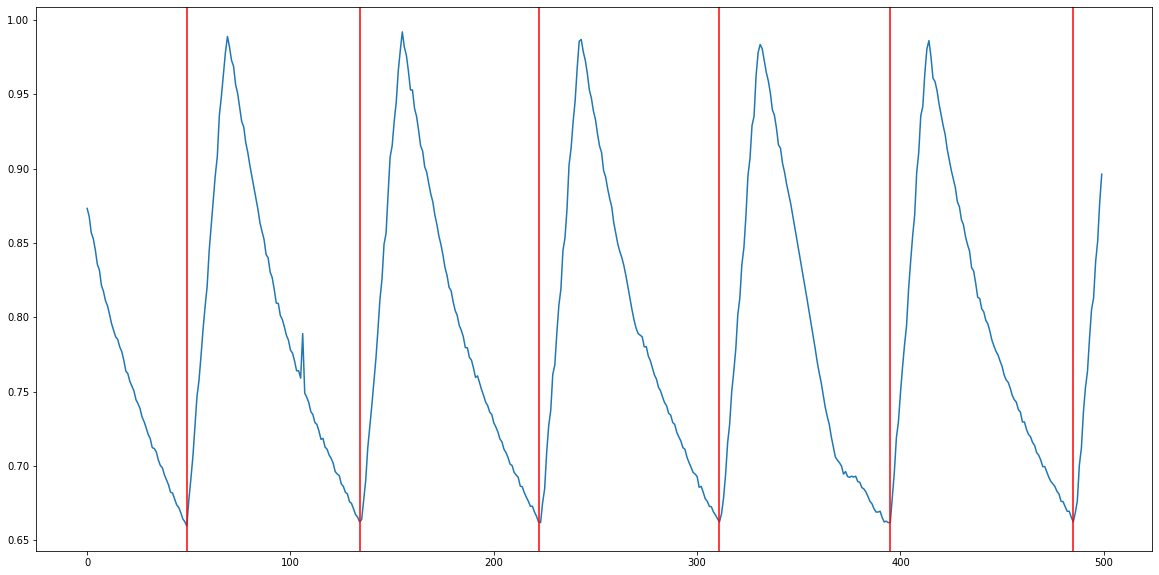

In [97]:
plt.figure(figsize=(20,10))
plt.plot(data_train[:500])
plt.axvline(x=49, color='red')
plt.axvline(x=49+85, color='red')
plt.axvline(x=49+85+88, color='red')
plt.axvline(x=49+85+88+89, color='red')
plt.axvline(x=49+85+88+89+84, color='red')
plt.axvline(x=49+85+88+89+84+90, color='red')

In [98]:
look_back = 150

data_X = rolling_window(data_train, look_back)
print(data_X.shape)

data_X = data_X.reshape(-1,1,look_back)
print(data_X.shape)

if use_cuda:
    train_x = torch.from_numpy(data_X).float().cuda()
else:
    train_x = torch.from_numpy(data_X).float()

(849, 150)
(849, 1, 150)


### Autoencode

In [57]:
# class autoencode(nn.Module):
#     def __init__(self, input_size):
#         super(autoencode, self).__init__()
#         self.encode = nn.Sequential(
#             nn.Linear(input_size,90),
#             nn.ReLU(True),
#             nn.Linear(90,32),
#             nn.ReLU(True),
#             nn.Linear(32,12),
#             nn.ReLU(True),
#             nn.Linear(12,3))
#         self.decode = nn.Sequential(
#             nn.Linear(3,12),
#             nn.ReLU(True),
#             nn.Linear(12,32),
#             nn.ReLU(True),
#             nn.Linear(32,90),
#             nn.ReLU(90,input_size),
#             nn.Tanh())
#         print(input_size)
        
#     def forward(self, x):
#         x = self.encode(x)
#         x = self.decode(x)
#         return x

In [58]:
# class autoencoder(nn.Module):
#     def __init__(self ,input_size):
#         super(autoencoder, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(input_size, 90),
#             nn.ReLU(True),
#             nn.Linear(90, 32),
#             nn.ReLU(True),
#             nn.Linear(32, 12),
#             nn.ReLU(True), 
#             nn.Linear(12, 3))
#         self.decoder = nn.Sequential(
#             nn.Linear(3, 12),
#             nn.ReLU(True),
#             nn.Linear(12, 32),
#             nn.ReLU(True),
#             nn.Linear(32, 90),
#             nn.ReLU(True),
#             nn.Linear(90, input_size), 
#             nn.Tanh())

#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.decoder(x)
#         return x

In [99]:
class autoencoder(nn.Module):
    def __init__(self ,input_size):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 500),
            nn.ReLU(True),
            nn.Linear(500, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 200),
            nn.ReLU(True), 
            nn.Linear(200, 50))
        self.decoder = nn.Sequential(
            nn.Linear(50, 200),
            nn.ReLU(True),
            nn.Linear(200, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 500),
            nn.ReLU(True),
            nn.Linear(500, input_size), 
            nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [100]:
net = autoencoder(look_back)

In [101]:
data_X.shape

(849, 1, 150)

In [102]:
criterion = nn.MSELoss()

In [103]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [104]:
if use_cuda:
    lgr.info("Using the GPU")
    net.cuda()
    criterion.cudo()

### Train Autoencode

In [105]:
net_loss = []

for e in range(500):
    var_x = Variable(train_x)
    out = net(var_x)
    loss = criterion(out, var_x)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    net_loss.append(loss.item())
    
    if (e+1) % 50 == 0:
        print('Epoch: {}, Loss: {:.5f}'.format(e+1, loss.item()))

Epoch: 50, Loss: 0.05147
Epoch: 100, Loss: 0.05147
Epoch: 150, Loss: 0.05147
Epoch: 200, Loss: 0.05147
Epoch: 250, Loss: 0.05147
Epoch: 300, Loss: 0.05147
Epoch: 350, Loss: 0.05147
Epoch: 400, Loss: 0.05147
Epoch: 450, Loss: 0.05147
Epoch: 500, Loss: 0.05147


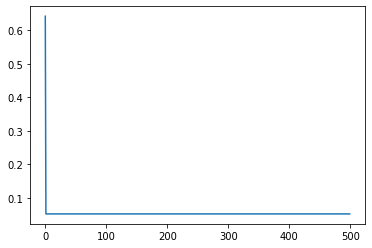

In [106]:
plt.plot(net_loss)

In [107]:
net = net.eval()

if use_cuda:
    lgr.info('Using the GPU')
    net.cuda()

In [108]:
# var_data = Variable(train_x)
# pred_test = net(var_data)
# pred_test = pred_test.view(-1,90)

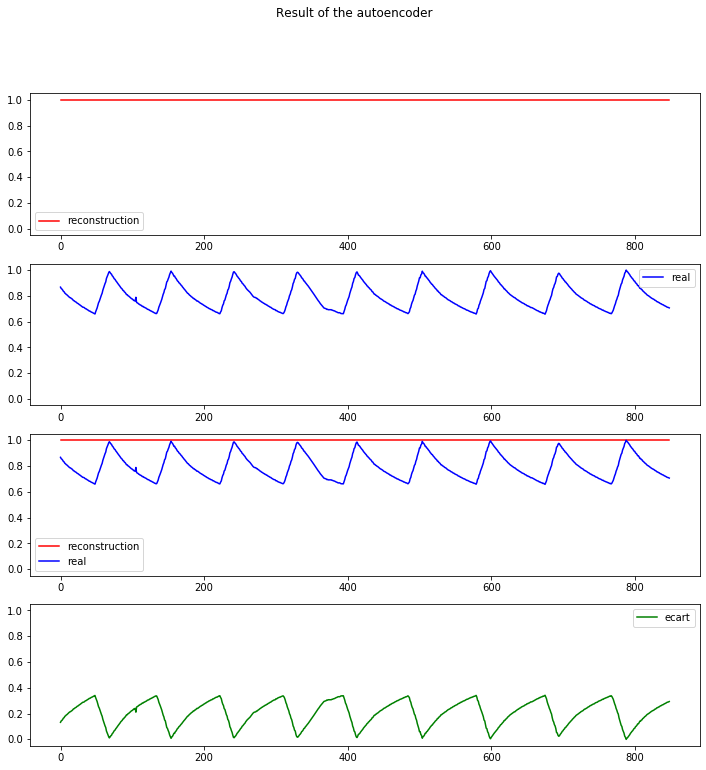

In [109]:
def reconstruction_viz2(train_x, autoencoder, lookback, index=0):
    var_data = Variable(train_x)
    pred_test = net(var_data)
    pred_test = pred_test.view(-1, lookback).data.cpu().numpy()
    data = train_x.view(-1, lookback).data.cpu().numpy()
    ecart = np.abs(np.subtract(data[:,1], pred_test[:,1]))
    
    fig, ax = plt.subplots(nrows=4, sharey=True, figsize=(12,12))
    ax[0].plot(pred_test[:,1], 'r', label='reconstruction')
    ax[0].legend(loc='best')
    ax[1].plot(data[:,1], 'b', label='real')
    ax[1].legend(loc='best')
    ax[2].plot(pred_test[:,1], 'r', label='reconstruction')
    ax[2].plot(data[:,1], 'b', label='real')
    ax[2].legend(loc='best')
    ax[3].plot(ecart, 'g', label='ecart')
    ax[3].legend(loc='best')
    plt.legend()
    plt.suptitle('Result of the autoencoder')
    plt.show()
    
reconstruction_viz2(train_x, net, look_back, index=0)
    